In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/14_youtube_video_popularity.csv")

# Display dataset info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      1000 non-null   object
 1   title         1000 non-null   object
 2   length        1000 non-null   int64 
 3   tags_count    1000 non-null   int64 
 4   duration_sec  1000 non-null   int64 
 5   views         1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None
  video_id                           title  length  tags_count  duration_sec  \
0  VID0000            Explore Python Other    3467          19          3467   
1  VID0001   Best of Data Science Whatever    2393          10          2393   
2  VID0002  Guide to Data Science American    2332          10          2332   
3  VID0003             Watch Gaming Better    2244          20          2244   
4  VID0004          Best of Review Subject    1665           4          1665   

   views  
0   4396  


In [ ]:
# Drop rows with missing values in key columns
df = df.dropna(subset=['views', 'tags_count', 'duration_sec'])

# Convert duration to integer
df['duration_sec'] = df['duration_sec'].astype(int)

# Feature: Viral = top 25% views
df['viral'] = (df['views'] > df['views'].quantile(0.75)).astype(int)

# Feature: Trending = top 25% (alternative label)
df['trending'] = df['viral']  # Optional if using same threshold

# Summary statistics
print(df.describe())


            length   tags_count  duration_sec         views        viral  \
count  1000.000000  1000.000000   1000.000000   1000.000000  1000.000000   
mean   1842.295000     9.969000   1842.295000   5871.866000     0.250000   
std    1049.978657     6.179662   1049.978657   2820.860338     0.433229   
min      41.000000     0.000000     41.000000    155.000000     0.000000   
25%     938.500000     4.000000    938.500000   3744.750000     0.000000   
50%    1864.500000    10.000000   1864.500000   5595.500000     0.000000   
75%    2775.250000    15.000000   2775.250000   7599.500000     0.250000   
max    3592.000000    20.000000   3592.000000  15312.000000     1.000000   

          trending  
count  1000.000000  
mean      0.250000  
std       0.433229  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.250000  
max       1.000000  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = df[['tags_count', 'duration_sec']]
y = df['views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 2120225.9464904685


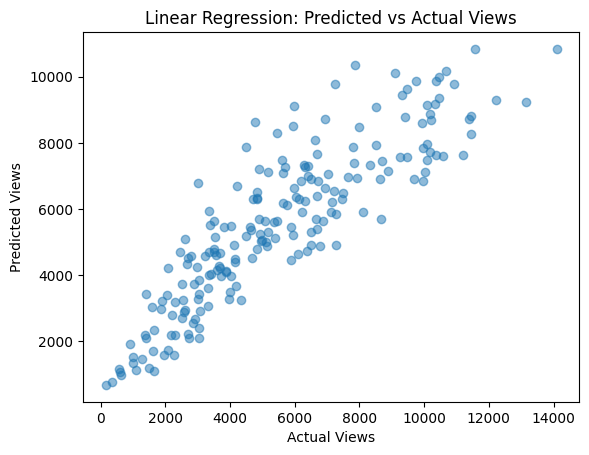

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")
plt.title("Linear Regression: Predicted vs Actual Views")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

X = df[['tags_count', 'duration_sec']]
y = df['viral']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       150
           1       0.61      0.54      0.57        50

    accuracy                           0.80       200
   macro avg       0.73      0.71      0.72       200
weighted avg       0.79      0.80      0.80       200



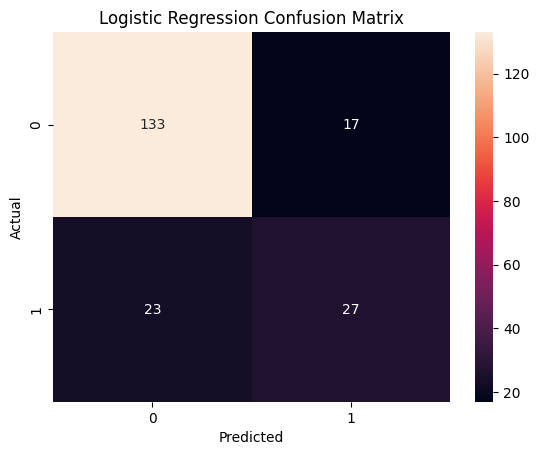

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.svm import SVC

X = df[['tags_count', 'duration_sec']]
y = df['trending']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86       150
           1       0.00      0.00      0.00        50

    accuracy                           0.75       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.56      0.75      0.64       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


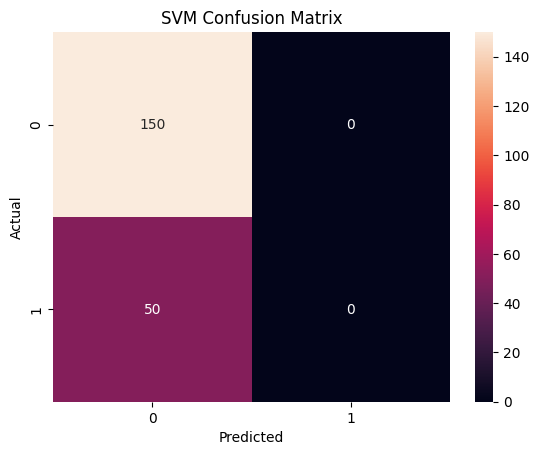

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

features = df[['tags_count', 'duration_sec', 'views']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

print("Silhouette Score:", silhouette_score(X_scaled, df['cluster']))


Silhouette Score: 0.3313213815242623


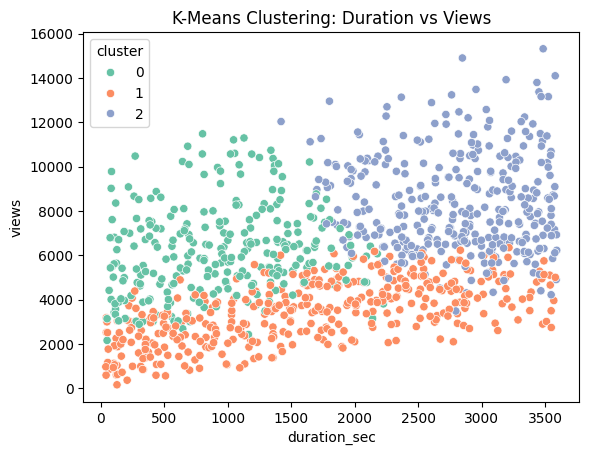

In [ ]:
sns.scatterplot(data=df, x='duration_sec', y='views', hue='cluster', palette='Set2')
plt.title("K-Means Clustering: Duration vs Views")
plt.show()


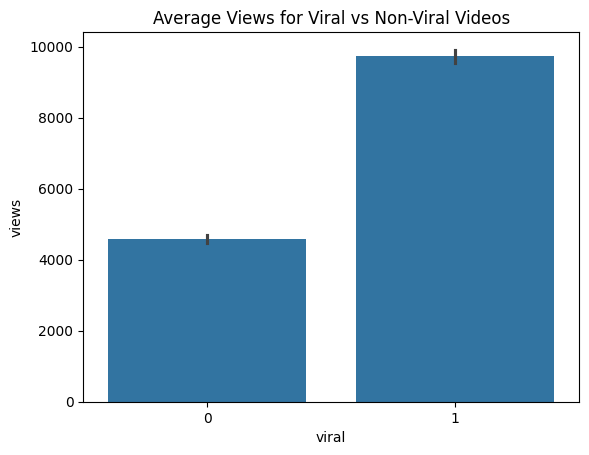

In [ ]:
sns.barplot(data=df, x='viral', y='views')
plt.title("Average Views for Viral vs Non-Viral Videos")
plt.show()
